<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/The_Correlation_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)

array([[0.07068442, 0.13867544],
       [0.13867544, 0.28007191]])

In [23]:
X = np.random.rand(50)
Y = 2 * X + 4

print(f'the Covariance of X and Y {str(np.cov(X, Y))}\n')
print(f'The correlation of X and Y {str(np.corrcoef(X, Y))}')

the Covariance of X and Y [[0.07172229 0.14344457]
 [0.14344457 0.28688914]]

The correlation of X and Y [[1. 1.]
 [1. 1.]]


In [24]:
cov_matrix = np.cov(X, Y)
error = cov_matrix[0, 0] - X.var(ddof=1)
print(f'Error: {error}')

Error: -1.3877787807814457e-17


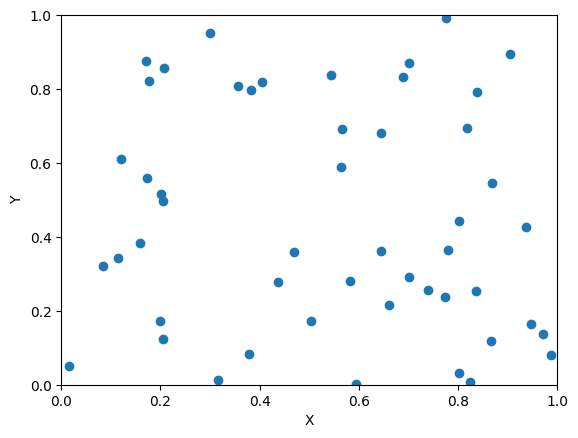

In [25]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [26]:
manual = str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y)))
builtin = str(np.corrcoef(X, Y)[0, 1])

print(f'Correlation: {manual}')
print(f'Numpy: {builtin}')

Correlation: -0.12171989741780918
Numpy: -0.119285499469453


### correlated variables

Correlation Coef: 0.9464


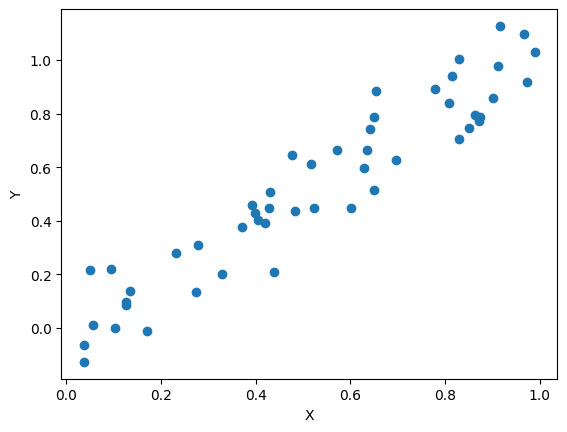

In [27]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

print(f'Correlation Coef: {np.corrcoef(X, Y)[0, 1]:0.4f}')

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
# plt.xlim([0, 1.2])
# plt.ylim([0, 1.2])
plt.show()

Correlation Coef: 0.7976


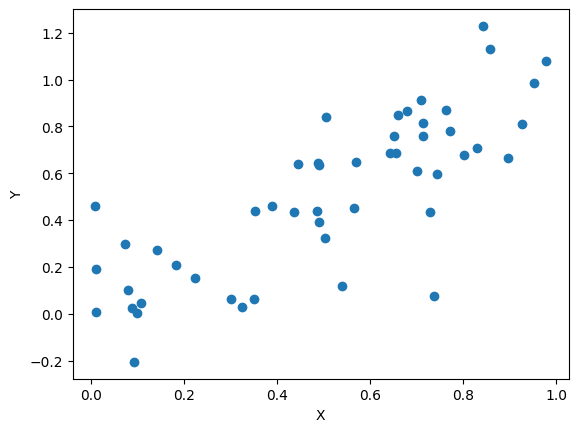

In [28]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50)

print(f'Correlation Coef: {np.corrcoef(X, Y)[0, 1]:0.4f}')

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
# plt.xlim([0, 1.2])
# plt.ylim([0, 1.2])
plt.show()

Correlation Coef: -0.9272


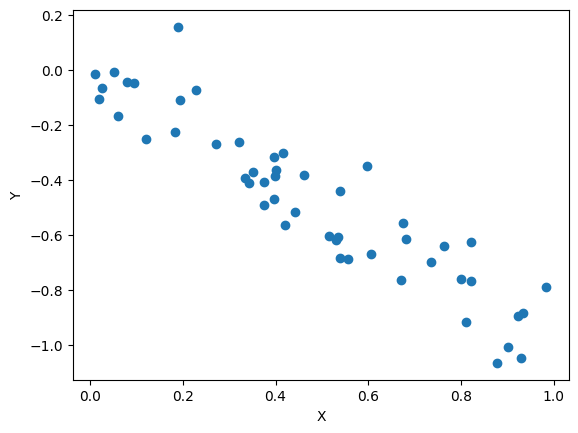

In [29]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

print(f'Correlation Coef: {np.corrcoef(X, Y)[0, 1]:0.4f}')

plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Using stock data

In [30]:
import yfinance as yf

start = '2013-01-01'
end = '2015-01-01'

bench = yf.download('SPY', start=start, end=end)['Close']
a1 = yf.download('LRCX', start=start, end=end)['Close']
a2 = yf.download('AAPL', start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlaion Coefficients
LRCX and APPL: 0.9547035322138486
LRCX and SPY: 0.8921746233896478
APPL and SPY: 0.9352035127183528



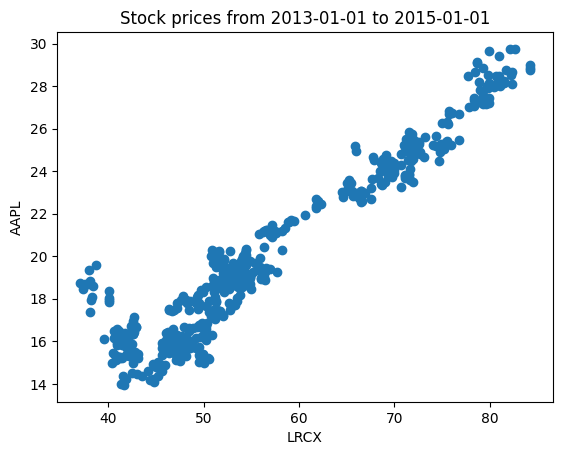

In [49]:
print(f'Correlaion Coefficients')
print(f'LRCX and APPL: {np.corrcoef(a1, a2)[0, 1]}')
print(f'LRCX and SPY: {np.corrcoef(a2, bench)[0, 1]}')
print(f'APPL and SPY: {np.corrcoef(a1, bench)[0, 1]}\n')

plt.scatter(a1, a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title(f'Stock prices from {start} to {end}')
plt.show()

In [32]:
pd.concat([a1, a2], axis=1).rolling(60).corr(pairwise=True)

Close     Close
Date                                
2013-01-02 Close       NaN       NaN
           Close       NaN       NaN
2013-01-03 Close       NaN       NaN
           Close       NaN       NaN
2013-01-04 Close       NaN       NaN
...                    ...       ...
2014-12-29 Close  0.884606  1.000000
2014-12-30 Close  1.000000  0.883157
           Close  0.883157  1.000000
2014-12-31 Close  1.000000  0.887574
           Close  0.887574  1.000000

[1008 rows x 2 columns]

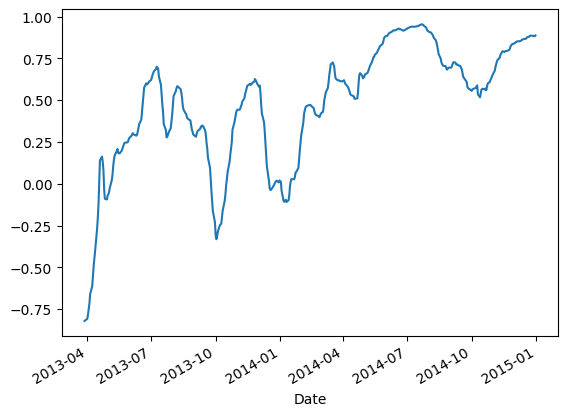

In [58]:
a1.rolling(60).corr(a2).plot()
plt.show()

Correlation Coefficient: 0.1860


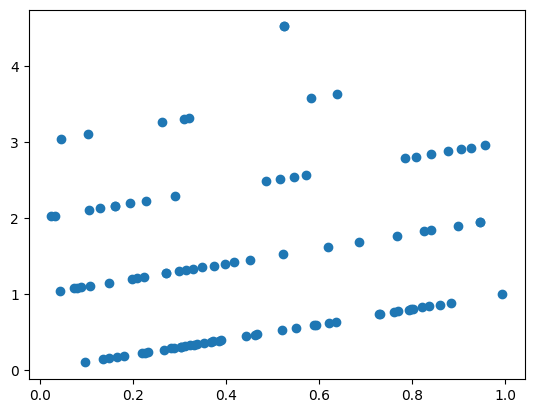

In [37]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

print(f'Correlation Coefficient: {np.corrcoef(X, Y)[0, 1]:0.4f}')

plt.scatter(X, Y)
plt.show()

### Questions

In [39]:
def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [41]:
## 1. Depending of Artificial Variables

A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

print(f'Covariance: {np.cov(A, B)[0, 1]}')
print(f'Correlation Coefficient: {np.corrcoef(A, B)[0, 1]}')

Covariance: -0.3006782483216274
Correlation Coefficient: -0.9993480012394593


In [42]:
c = np.random.rand(100)
d = np.random.normal(0, 0.5, 100)

print(f'Covariance: {np.cov(c, d)[0, 1]}')
print(f'Correlation Coefficient: {np.corrcoef(c, d)[0, 1]}')

Covariance: -0.006383320913604273
Correlation Coefficient: -0.044417928710541815


In [46]:
## 2. Constructing Example Relationships

X = np.random.rand(100)
Y = 1.5 * X + np.random.normal(0, 0.1, 100)

print(f'Covariance: {np.cov(X, Y)[0, 1]}')
print(f'Correlation Coefficient: {np.corrcoef(X, Y)[0, 1]}')

Covariance: 0.11060502575692385
Correlation Coefficient: 0.9660227074654052


In [47]:
X = np.random.rand(100)
Y = -1.5 * X + np.random.normal(0, 0.1, 100)

print(f'Covariance: {np.cov(X, Y)[0, 1]}')
print(f'Correlation Coefficient: {np.corrcoef(X, Y)[0, 1]}')

Covariance: -0.13955447884268854
Correlation Coefficient: -0.977818558834036


In [51]:
## 3. Correlation of Real Assets
start = '2013-01-01'
end = '2015-01-01'

oke = yf.download('OKE', start=start, end=end)['Close']
lake = yf.download('LAKE', start=start, end=end)['Close']
benchmark = yf.download('SPY', start=start, end=end)['Close']

print(f'\nCorrelaion Coefficients')
print(f'OKE and LAKE: {np.corrcoef(oke, lake)[0, 1]}')
print(f'OKE and SPY: {np.corrcoef(oke, benchmark)[0, 1]}')
print(f'LAKE and SPY: {np.corrcoef(lake, benchmark)[0, 1]}\n')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlaion Coefficients
OKE and LAKE: 0.4151007944371709
OKE and SPY: 0.8297785104539034
LAKE and SPY: 0.6113967907777006



In [54]:
symbol_list = ['GSK', 'AZO', 'AMZN']
data = yf.download(symbol_list, start=start, end=end)['Close']
data

[*********************100%%**********************]  3 of 3 completed


Ticker,AMZN,AZO,GSK
Date,,,
2013-01-02,12.8655,356.880005,44.130001
2013-01-03,12.9240,356.140015,43.980000
2013-01-04,12.9575,360.850006,44.259998
2013-01-07,13.4230,356.170013,44.270000
2013-01-08,13.3190,348.250000,44.270000
...,...,...,...
2014-12-24,15.1515,617.429993,42.849998
2014-12-26,15.4545,618.760010,43.150002
2014-12-29,15.6020,624.489990,43.209999


In [55]:
find_most_correlated(data)

(('AMZN', 'AZO'), 0.5243492754557257)

In [57]:
## 4. Limitations of Correlation

FB_15 = yf.download('META', start='2015-01-01', end='2016-01-01')['Close']
AMZN_15 = yf.download('AMZN', start='2015-01-01', end='2016-01-01')['Close']
FB_16 = yf.download('META', start='2016-01-01', end='2016-07-01')['Close']
AMZN_16 = yf.download('AMZN', start='2016-01-01', end='2016-07-01')['Close']

print('\nCorrelation Coefficients')
print(f'FB_15 and AMZN_15: {np.corrcoef(FB_15, AMZN_15)[0, 1]}')
print(f'FB_16 and AMZN_16: {np.corrcoef(FB_16, AMZN_16)[0, 1]}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Correlation Coefficients
FB_15 and AMZN_15: 0.9575381905117571
FB_16 and AMZN_16: 0.6512076114203451


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


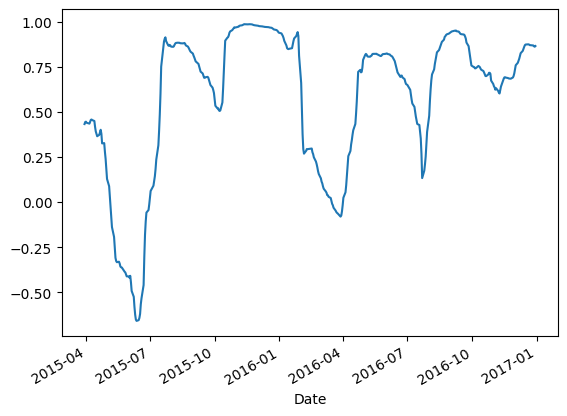

In [59]:
FB = yf.download('META', start='2015-01-01', end='2017-01-01')['Close']
AMZN = yf.download('AMZN', start='2015-01-01', end='2017-01-01')['Close']

FB.rolling(60).corr(AMZN).plot()
plt.show()